# Evaluate Equivalence between RBAs with different number of edges

## Evaluate the collected indicators

### Load the experiments indicators

In [132]:
import numpy as np
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt

exp_path = "outputs/exp7_data_3_8_1000/"
indicators_file = exp_path + 'data.csv'
df = pd.read_csv(indicators_file)
print("Indicators Loaded")
df = df

Indicators Loaded


# Reduce the length of the data to 100 registers

In [133]:
df = df[(df['i_sample'] >= 1) & (df['i_sample'] <= 30)]
df

,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_edges,n_local_attractors,n_pair_attractors,n_attractor_fields,n_time_find_attractors,n_time_find_pairs,n_time_find_fields
0,1,3,5,2,2,2,3,7,10,1,0.268690,0.000143,0.000147
1,1,3,5,2,2,2,4,8,16,1,0.408261,0.000288,0.000272
2,1,4,5,2,2,2,4,8,8,1,0.398364,0.000153,0.000132
3,1,4,5,2,2,2,5,10,16,1,0.523123,0.000259,0.000282
4,1,4,5,2,2,2,6,12,30,1,0.659598,0.000301,0.000560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,30,8,5,2,2,2,8,54,208,35416,1.334233,0.000311,3.964326
626,30,8,5,2,2,2,9,62,278,37904,1.488466,0.000452,10.245083
627,30,8,5,2,2,2,10,70,436,39824,1.683614,0.000464,25.560624
628,30,8,5,2,2,2,11,78,706,42128,1.941985,0.000563,99.488924


## Filter by local network = 8

In [134]:
# Filter by the number of local networks
n_local_networks = 8
df_filter = df[df['n_local_networks'] == n_local_networks]
num_registers = df_filter.shape[0]
print(f"There are {num_registers} records for RBAs with {n_local_networks} local networks.")

There are 150 records for RBAs with 8 local networks.


In [135]:
df_filter

,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_edges,n_local_attractors,n_pair_attractors,n_attractor_fields,n_time_find_attractors,n_time_find_pairs,n_time_find_fields
16,1,8,5,2,2,2,8,16,16,1,0.737581,0.000278,0.000251
17,1,8,5,2,2,2,9,18,24,1,0.679238,0.000315,0.000481
18,1,8,5,2,2,2,10,20,38,1,0.906117,0.000385,0.001019
19,1,8,5,2,2,2,11,22,44,1,1.470146,0.000375,0.001770
20,1,8,5,2,2,2,12,24,56,1,1.363252,0.000592,0.005342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,30,8,5,2,2,2,8,54,208,35416,1.334233,0.000311,3.964326
626,30,8,5,2,2,2,9,62,278,37904,1.488466,0.000452,10.245083
627,30,8,5,2,2,2,10,70,436,39824,1.683614,0.000464,25.560624
628,30,8,5,2,2,2,11,78,706,42128,1.941985,0.000563,99.488924


### Find the sample with Maximum number of Stable Attractor Fields

In [136]:
# Find the index of the maximum value of 'n_attractor_fields' and get 'i_sample' and 'Number of Edges'
max_sample = df_filter.loc[df_filter['n_attractor_fields'].idxmax(), ['i_sample', 'n_edges']]

# Assign the values of the sample and the number of edges
# i_sample_max = 84
i_sample_max = int(max_sample['i_sample'])
n_edges_max = int(max_sample['n_edges'])

# Print the result
print(f"The sample with the most attractor fields is {i_sample_max} with {n_edges_max} edges.")

The sample with the most attractor fields is 30 with 12 edges.


outputs/exp7_data_3_8_1000/pkl_cbn/cbn_30_8_


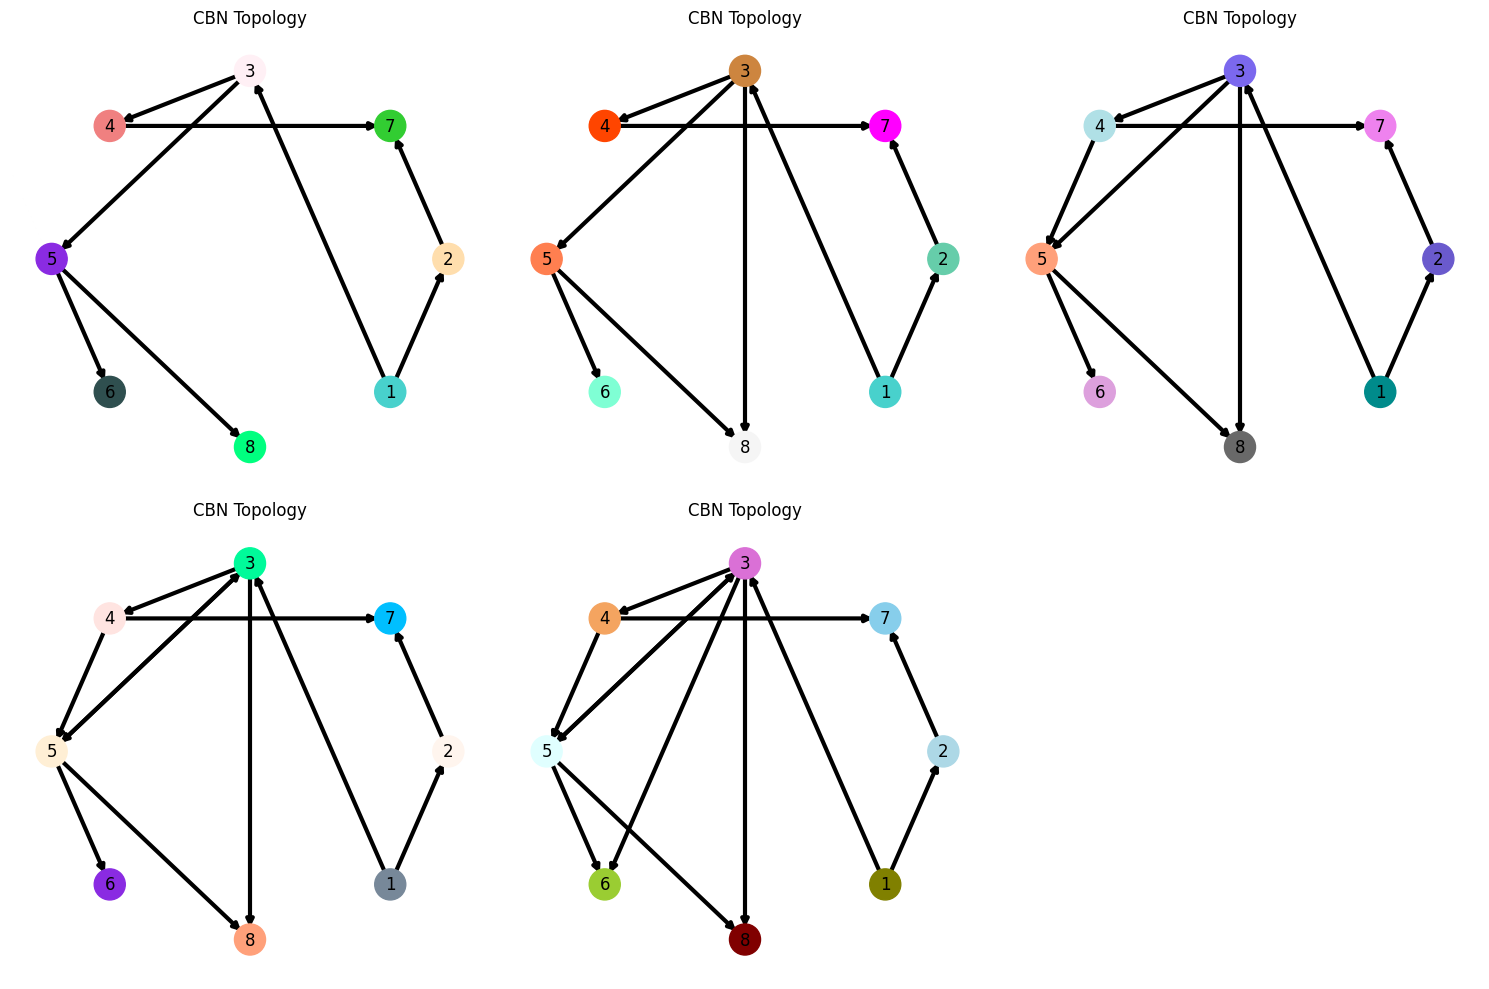

In [137]:
# Define the new sample and network number for loading files
i_sample = i_sample_max
n_networks = 8

# Ruta base sin el número cambiante
base_path_cbn = f'outputs/exp7_data_3_8_1000/pkl_cbn/cbn_{i_sample}_{n_networks}_'
print(base_path_cbn)

# Número inicial y rango máximo
initial_number_edges = 8
max_number_edges = 12

# Lista de archivos pickle existentes
pickle_files = [f"{base_path_cbn}{i}.pkl" for i in range(initial_number_edges, max_number_edges + 1) if os.path.exists(f"{base_path_cbn}{i}.pkl")]

# Número total de gráficos
total_graphs = len(pickle_files)

# Configuración de subplots en múltiples filas y columnas
cols = 3
rows = max(1, (total_graphs + cols - 1) // cols)  # Ensure rows is at least 1

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Aplanar la matriz de ejes si hay más de una fila
if rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]  # Convert the single axis to a list for consistency

# Iterador para cargar y mostrar las topologías
for path_cbn, ax in zip(pickle_files, axes):
    with open(path_cbn, 'rb') as file:
        o_cbn = pickle.load(file)
    
    # Mostrar la información de CBN en el subplot correspondiente
    o_cbn.plot_topology(ax=ax)  # Asegúrate de que plot_topology acepte un parámetro ax
    
# Eliminar ejes vacíos si hay menos gráficos que espacios de subplots
if total_graphs < rows * cols:
    # Flatten the axes array (if it's an array) into a list
    axes = np.ravel(axes)
    
    # Iterate through and delete any unused axes
    for ax in axes[total_graphs:]:
        fig.delaxes(ax)

# Ajustar el layout y mostrar todas las gráficas juntas
plt.tight_layout()
plt.show()

### Load the CBN objects for a specific sample

In [138]:
# Define the second number in the pickle file path
i_sample = i_sample_max

# Base path without the changing number
base_path_cbn = f'{exp_path}pkl_cbn/cbn_{int(i_sample)}_{n_local_networks}_'
print(f"Base path is: {base_path_cbn}")

# Initial number and maximum range
initial_number_edges = n_local_networks
max_number_edges = 2 * initial_number_edges

# List of existing pickle files
pickle_files = [f"{base_path_cbn}{i}.pkl" for i in range(initial_number_edges, max_number_edges + 1) if os.path.exists(f"{base_path_cbn}{i}.pkl")]

l_o_cbn = []
# Iterator to load and display the topologies
for path_cbn in pickle_files:
    with open(path_cbn, 'rb') as file:
        o_cbn = pickle.load(file)
        l_o_cbn.append(o_cbn)
        print(f"Loaded {path_cbn}")
print('CBN objects loaded into l_o_cbn')

Base path is: outputs/exp7_data_3_8_1000/pkl_cbn/cbn_30_8_
Loaded outputs/exp7_data_3_8_1000/pkl_cbn/cbn_30_8_8.pkl
Loaded outputs/exp7_data_3_8_1000/pkl_cbn/cbn_30_8_9.pkl
Loaded outputs/exp7_data_3_8_1000/pkl_cbn/cbn_30_8_10.pkl
Loaded outputs/exp7_data_3_8_1000/pkl_cbn/cbn_30_8_11.pkl
Loaded outputs/exp7_data_3_8_1000/pkl_cbn/cbn_30_8_12.pkl
CBN objects loaded into l_o_cbn


### Stable attractor fields for every Global Scene from specific sample 

In [139]:
from concurrent.futures import ProcessPoolExecutor
import pandas as pd

# Función para procesar cada o_cbn individualmente
def process_o_cbn(o_cbn, i_sample, n_local_networks):
    data = {"sample": [], "number_of_local_networks": [], "number_of_edges": [], "global_scene": [], "attractor_fields_count": []}

    num_edges = len(o_cbn.l_directed_edges)
    attractor_fields = o_cbn.get_n_attractor_fields()

    o_cbn.count_fields_by_global_scenes()  # Actualiza datos internos

    dict_global_scenes = o_cbn.get_global_scene_attractor_fields()

    if dict_global_scenes:
        for scene, count in dict_global_scenes.items():
            data["sample"].append(i_sample)
            data["number_of_local_networks"].append(n_local_networks)
            data["number_of_edges"].append(num_edges)
            data["global_scene"].append(scene)
            data["attractor_fields_count"].append(count)

    return data

# Función para ejecutar en cada proceso
def execute_process(o_cbn):
    return process_o_cbn(o_cbn, i_sample, n_local_networks)

# Paralelización usando ProcessPoolExecutor
data = {"sample": [], "number_of_local_networks": [], "number_of_edges": [], "global_scene": [], "attractor_fields_count": []}

with ProcessPoolExecutor() as executor:
    # Ejecuta la función en paralelo para cada o_cbn en l_o_cbn
    results = executor.map(execute_process, l_o_cbn)

    # Combina los resultados de cada ejecución paralela
    for result in results:
        for key in data:
            data[key].extend(result[key])

# Crear DataFrame
df_resume = pd.DataFrame(data)

# format the data
df['n_edges'] = df['n_edges'].astype(int)

# Mostrar el DataFrame en el notebook
df_resume

,sample,number_of_local_networks,number_of_edges,global_scene,attractor_fields_count
0,30,8,8,10011111,2304
1,30,8,8,11111111,15552
2,30,8,8,11110011,1296
3,30,8,8,11101111,5184
4,30,8,8,11100011,432
...,...,...,...,...,...
73,30,8,12,011011111011,864
74,30,8,12,000100110100,96
75,30,8,12,000111110110,1152
76,30,8,12,011100111101,1728


### Sum the number attractor fields by edge

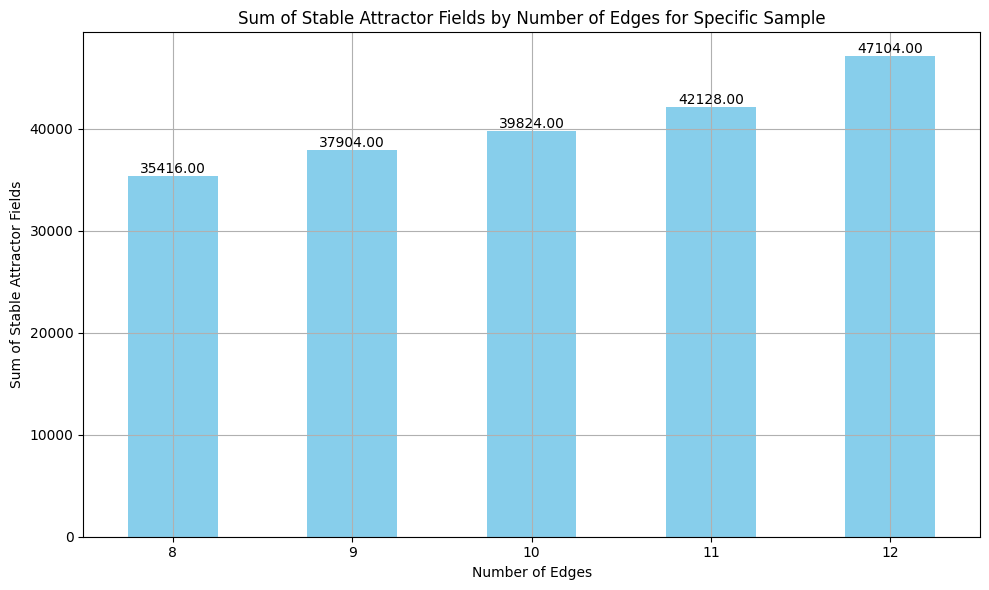

In [140]:
import matplotlib.pyplot as plt

# Group by 'number_of_edges' and sum the 'attractor_fields_count' column
df_suma_attractors = df_resume.groupby('number_of_edges')['attractor_fields_count'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = df_suma_attractors.plot(kind='bar', color='skyblue')

# Add values on top of each bar, showing decimals
for i, value in enumerate(df_suma_attractors):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom')

# Plot configuration
plt.title('Sum of Stable Attractor Fields by Number of Edges for Specific Sample')
plt.xlabel('Number of Edges')
plt.ylabel('Sum of Stable Attractor Fields')
plt.xticks(rotation=0)
plt.grid(True, which='both', axis='both')  # Activate grid for both axes

plt.tight_layout()

# Show plot
plt.show()

### Count the global scenes by edge

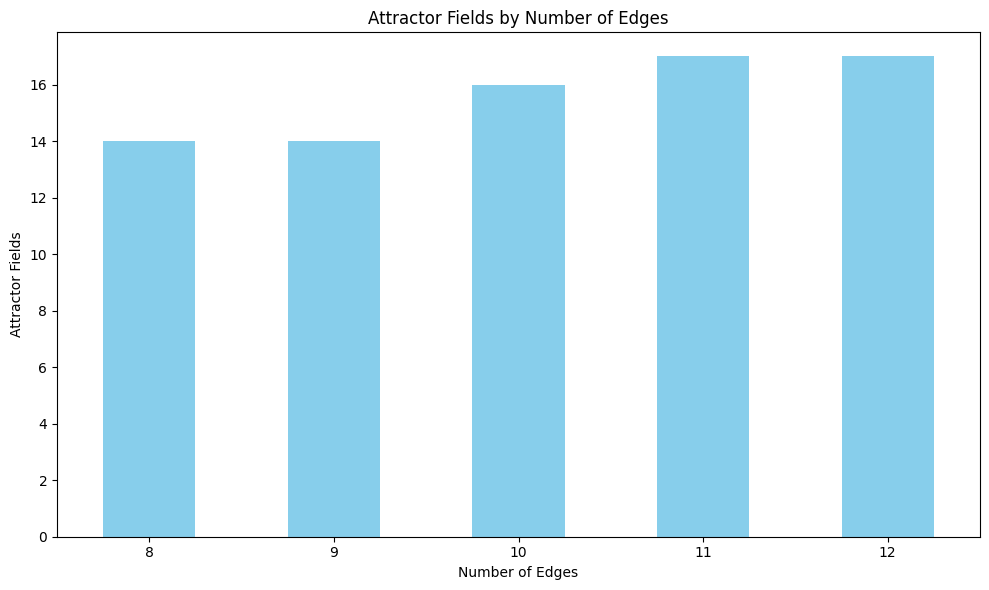

In [141]:
import matplotlib.pyplot as plt

# Group by 'Number of Edges' and count the 'Global Scene' column
df_count_attractors = df_resume.groupby('number_of_edges')['global_scene'].count()

# Create a bar plot
plt.figure(figsize=(10, 6))
df_count_attractors.plot(kind='bar', color='skyblue')

# Plot configuration
plt.title('Attractor Fields by Number of Edges')
plt.xlabel('Number of Edges')
plt.ylabel('Attractor Fields')
plt.xticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()

### Evaluate the correspondence between global scenes

In [142]:
df_resume.keys()

Index(['sample', 'number_of_local_networks', 'number_of_edges', 'global_scene',
       'attractor_fields_count'],
      dtype='object')

In [143]:
import pandas as pd
import numpy as np

# Supongamos que df_resume ya está definido con tus datos

# Crear una copia del DataFrame original
df_new = df_resume.copy()

# Determinar los valores únicos de número de aristas
unique_edges = sorted(df_new['number_of_edges'].unique(), reverse=True)

# Inicializar las nuevas columnas para escenas y campos atractores
for edge in unique_edges:
    df_new[f'pr_scene_{edge}'] = ""
    df_new[f'at_fields_{edge}'] = ""

def fill_scenes_recursively(df, current_edge, index, current_scene):
    subscene_length = len(current_scene) - 1
    
    if subscene_length < min(unique_edges):
        return
    
    if subscene_length not in unique_edges:
        return
    
    # Buscar las escenas menores correspondientes
    subscene_prefix = current_scene[:subscene_length]
    subscenes = df[(df['number_of_edges'] == subscene_length) & (df['global_scene'].str.startswith(subscene_prefix))]['global_scene']
    
    if not subscenes.empty:
        df.at[index, f'pr_scene_{subscene_length}'] = ' '.join(subscenes)
        
        # Asignar los campos atractores correspondientes
        attractors = df[df['global_scene'].isin(subscenes) & (df['number_of_edges'] == subscene_length)]['attractor_fields_count']
        if not attractors.empty:
            df.at[index, f'at_fields_{subscene_length}'] = ' '.join(attractors.astype(str))
        else:
            df.at[index, f'at_fields_{subscene_length}'] = ""
        
        # Llamar recursivamente para el siguiente nivel de escena menor
        for scene in subscenes:
            fill_scenes_recursively(df, subscene_length, index, scene)

# Llenar las nuevas columnas usando el enfoque recursivo
for index, row in df_new.iterrows():
    current_scene = row['global_scene']
    current_edge = row['number_of_edges']
    
    # Llenar el campo 'attractor_fields' para la escena global actual
    df_new.at[index, f'at_fields_{current_edge}'] = row['attractor_fields_count']
    
    # Iniciar el llenado recursivo desde la escena global actual
    fill_scenes_recursively(df_new, current_edge, index, current_scene)

# Cambiar el nombre de la columna 'number_of_edges' a 'edges' si existe
if 'number_of_edges' in df_new.columns:
    df_new.rename(columns={'number_of_edges': 'edges'}, inplace=True)

# Eliminar la columna 'Scenes_12' si existe
if 'Scenes_12' in df_new.columns:
    df_new = df_new.drop(columns=['Scenes_12'])

# Reordenar las columnas: primero los global scenes, luego las escenas contenidas y finalmente los campos atractores
scenes_columns = [f'pr_scene_{edge}' for edge in unique_edges if edge != 12]
attractors_columns = [f'at_fields_{edge}' for edge in unique_edges]

# Crear la estructura final del DataFrame
df_final = df_new[['edges', 'global_scene'] + scenes_columns + attractors_columns]

# Función para manejar el ordenamiento, tratando los valores vacíos como menores
def sort_custom(df, columns):
    return df.sort_values(by=columns, ascending=[False] * len(columns), na_position='first')

# Ordenar el DataFrame primero por número de edges, luego por las columnas de escenas menores
df_final = sort_custom(df_final, ['edges'] + scenes_columns)

# Mostrar el DataFrame resultante
df_final

,edges,global_scene,pr_scene_11,pr_scene_10,pr_scene_9,pr_scene_8,at_fields_12,at_fields_11,at_fields_10,at_fields_9,at_fields_8
71,12,111111111111,11111111111,1111111111,111111111,11111111,15552,15552,15552,15552,15552
65,12,111111001111,11111100111,1111110011,111111001,11111100,3456,3456,2304,2304,2304
70,12,111100111101,11110011110,1111001111,111100111,11110011,5184,2592,2592,2592,1296
64,12,111100001101,11110000110,1111000011,111100001,11110000,768,384,384,384,192
67,12,111011111011,11101111101,1110111110,111011111,11101111,5184,5184,5184,5184,5184
...,...,...,...,...,...,...,...,...,...,...,...
9,8,01110011,,,,,,,,,432
10,8,11101100,,,,,,,,,768
11,8,11100000,,,,,,,,,64
12,8,11111100,,,,,,,,,2304


In [144]:
# Filtrar solo las filas que tienen 12 aristas
df_filtered = df_resume[df_resume['number_of_edges'] == 12].copy()

# Renombrar las columnas 'global_scene' a 'global_scene_12' y 'pr_scene_11' a 'global_scene_11'
df_filtered.rename(columns={'global_scene': 'global_scene_12'}, inplace=True)

# Crear nuevas columnas para las escenas de 11 aristas y sus respectivos campos atractores
df_filtered['global_scene_11'] = ""
df_filtered['at_fields_12'] = ""
df_filtered['at_fields_11'] = ""

def fill_11_edges_scenes(df_12, df_all):
    for index, row in df_12.iterrows():
        # Asignar el campo atractor de 12 aristas
        df_12.at[index, 'at_fields_12'] = row['attractor_fields_count']
        
        # Buscar las escenas de 11 aristas que dependen de la escena de 12 aristas
        scene_11 = df_all[(df_all['number_of_edges'] == 11) & (df_all['global_scene'].str.startswith(row['global_scene_12'][:-1]))]
        if not scene_11.empty:
            # Asignar la escena de 11 aristas y su número de campos atractores
            df_12.at[index, 'global_scene_11'] = ' '.join(scene_11['global_scene'].astype(str))
            df_12.at[index, 'at_fields_11'] = ' '.join(scene_11['attractor_fields_count'].astype(str))

# Llenar los campos de 11 aristas basados en las escenas de 12 aristas
fill_11_edges_scenes(df_filtered, df_resume)

# Seleccionar solo las columnas necesarias: escenas de 12 y 11 aristas con sus campos atractores
df_final_12_11 = df_filtered[['global_scene_12', 'global_scene_11', 'at_fields_12', 'at_fields_11']]

# Mostrar el DataFrame resultante
df_final_12_11

,global_scene_12,global_scene_11,at_fields_12,at_fields_11
61,111000001001,11100000100,256,128
62,111011001011,11101100101,1152,1152
63,100111000110,10011100011,768,768
64,111100001101,11110000110,768,384
65,111111001111,11111100111,3456,3456
66,111000111001,11100011100,1728,864
67,111011111011,11101111101,5184,5184
68,100100110100,10010011010,288,288
69,100111110110,10011111011,3456,3456
70,111100111101,11110011110,5184,2592


In [145]:
# Rename the columns to more descriptive names
df_final_12_11.columns = [
    'Global Scene (12 Edges)', 
    'Global Scene (11 Edges)', 
    'Attractor Fields (12 Edges)', 
    'Attractor Fields (11 Edges)'
]

# Convert the DataFrame to LaTeX
latex_table = df_final_12_11.to_latex(index=False, escape=False)

# Display the LaTeX result
print(latex_table)

\begin{tabular}{llll}
\toprule
Global Scene (12 Edges) & Global Scene (11 Edges) & Attractor Fields (12 Edges) & Attractor Fields (11 Edges) \\
\midrule
111000001001 & 11100000100 & 256 & 128 \\
111011001011 & 11101100101 & 1152 & 1152 \\
100111000110 & 10011100011 & 768 & 768 \\
111100001101 & 11110000110 & 768 & 384 \\
111111001111 & 11111100111 & 3456 & 3456 \\
111000111001 & 11100011100 & 1728 & 864 \\
111011111011 & 11101111101 & 5184 & 5184 \\
100100110100 & 10010011010 & 288 & 288 \\
100111110110 & 10011111011 & 3456 & 3456 \\
111100111101 & 11110011110 & 5184 & 2592 \\
111111111111 & 11111111111 & 15552 & 15552 \\
011000111001 & 01100011100 & 288 & 144 \\
011011111011 & 01101111101 & 864 & 864 \\
000100110100 & 00010011010 & 96 & 96 \\
000111110110 & 00011111011 & 1152 & 1152 \\
011100111101 & 01110011110 & 1728 & 864 \\
011111111111 & 01111111111 & 5184 & 5184 \\
\bottomrule
\end{tabular}

